## <p style="text-align: right;"> &#9989; Lawpan Melvin Toe</p>

# CMSE 202 Final (Section 004 - Spring 2024)

The goal of this final is to give you the opportunity to test out some of the skills that you've developed having now finished CMSE 202. In particular, you'll be committing and pushing repository changes to a GitHub repository, working with data to build a network graph, performing regression analysis, and classifying data using a machine learning classifier. You should find that you have all of the skills necessary to complete this exam having completed the second half of CMSE 202!

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam. Once you've read through it, you'll probably want to make sure you do Part 1 first to ensure that your GitHub repository is working correctly. Let your instructor know right away if you run into issues!

The exam is set up so that even if you get stuck on one part there are opportunities to get points on the other parts, so consider jumping ahead if you feel like you aren't making progress and then come back later if you have time.

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. You can also use _your version_ of past CMSE 202 assignments and the CMSE 202 course materials as a resource! **However: The use of any person-to-person communication software or generative AI tools is absolutely not acceptable.** If you are seen accessing your email, using a collaborative cloud storage or document software (e.g. Slack, Google Documents), or generative AIs (e.g. ChatGPT), you will be at risk for receiving a zero on the exam.

**Keep your eyes on your screen!** Unfortunately, there isn't enough space in the room for everyone to sit at their own table so please do your best to keep your eyes on your own screen. This exam is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. If any of the instructors observe suspicious behavior, you will, again, risk receiving a zero. 

---
## Part 0: Academic integrity statement

Read the following statement and edit the markdown text to put your name in the statement. This is your commitment to doing your own authentic work on this exam.

> I, **Lawpan Melvin Toe**, affirm that this exam represents my own authetic work, without the use of any unpermitted aids or resources or person-to-person communication. I understand that this exam an an opportunity to showcase my own progress in developing and improving my computational skills and have done my best to demonstrate those skills.

---
## Part 1: Add to your Git repository to track your progress on your exam (4 points)

Before you get to far along in the exam, you're going to add it to the `cmse202-s24-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. **Make sure to pull your most recent respository before beginning**. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s24-turnin` repository and create a new directory called `final`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s24-turnin`" repository inside the `final` directory that you just created. Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

``` bash
# Put the command for cloning your repository here!
git clone https://github.com/Lawpantoe/CMSE202-s24-turnin

```

---
## Part 2: Generate a network graph from data (16 points)

In this part of the exam, we will look at Facebook groups in Tennessee. Some of these groups are very connected (share members with many groups), while others are not very connected (share members with few other groups). We will model these group connections as an undirected graph. Every node will be a Facebook group and there will be an edge between two groups if they share at least one member. The dataset originally comes from [here](https://www.kaggle.com/datasets/stkbailey/nashville-meetup?select=group-edges.csv).

&#9989; **Question 2.1 (3 points)**: To get started, **download the `.csv` file and place it in the same directory as your notebook**, then **read in the `FacebookGroupNetwork.csv` dataset** and finally **display the first few rows of the data**. You can use **Pandas** for this task or any other Python tool you prefer.

In [4]:
### Put your code here
import pandas as pd

Facebook_Group = pd.read_csv("FacebookGroupNetwork.csv")
Facebook_Group

,group1,group2,weight
0,Nashville CocoaHeads,Nash.rb,2
1,Nashville CocoaHeads,Nashville Christian Technologists and Entrepre...,1
2,Nashville CocoaHeads,Stepping Out Social Dance Meetup,1
3,Nashville CocoaHeads,NashReact,2
4,Nashville CocoaHeads,WordPress Nashville,1
...,...,...,...
6687,Music City Jazz Fans,"Movie Lovers: New, Classic, and Foreign Films...",2
6688,Nashville Electronic Music & Synthesizer Meetup,Advanced Audio + Applications Exchange (A3E) -...,1
6689,Nashville Electronic Music & Synthesizer Meetup,Nashville Music Programmers,1
6690,Advanced Audio + Applications Exchange (A3E) -...,Nashville Music Programmers,2


You should see three columns: `group1`, `group2`, and `weight`. We are going to ignore `weight` in this exam (it is the number of members shared between groups). `group1` and `group2` are the two (unique) group names that share some number of members. We will now create a `networkx` graph using this dataset.

&#9989; **Question 2.2 (4 points)**: **Create an undirected `networkx` graph** (you can call it `G`). Make sure it is an undirected graph. Then, iterate over the dataset and **add edges between the `group1` and `group2` groups** on each line. Ignore the weights. (The resulting graph should now have an edge per entry in the dataset and the set of all group names should be the set of all nodes.)

In [22]:
### Put your code here
import networkx as nx

Facebook_Group_noweight = Facebook_Group.drop('weight', axis=1)

# Initialize an empty undirected graph
G = nx.Graph()

# Iterate over the dataset and add edges between group1 and group2
for index, row in Facebook_Group_noweight.iterrows():
    group1 = row['group1']
    group2 = row['group2']
    G.add_edge(group1, group2)

#https://stackoverflow.com/questions/16476924/how-can-i-iterate-over-rows-in-a-pandas-dataframe

We will now visualize the graph.

&#9989; **Question 2.3 (5 points)**: Create a large figure for drawing the graph using something like `plt.figure(figsize=(20,20))`. Then, draw the graph using `networkx`. Make sure that when drawing your graph, you accomplish the following:
1. The `"Data Science Nashville"` node should be colored red (it may be hard to see since this will appear in the middle since it is a highly connected group).
2. The group `"Nashville Squash Meetup"` should be colored blue (this will appear at the edge with only one connection).
3. All of the other groups should have a third, different color.

To recap, you should have **three** different colors in your graph, one for `"Data Science Nashville"`, one for `"Nashville Squash Meetup"`, and one for all of the other groups.

(Partial credit if you generate the graph but the colors are not set as described.)

**Note**: this will be a very crowded graph because it's a complex, heavily-interconnected network.

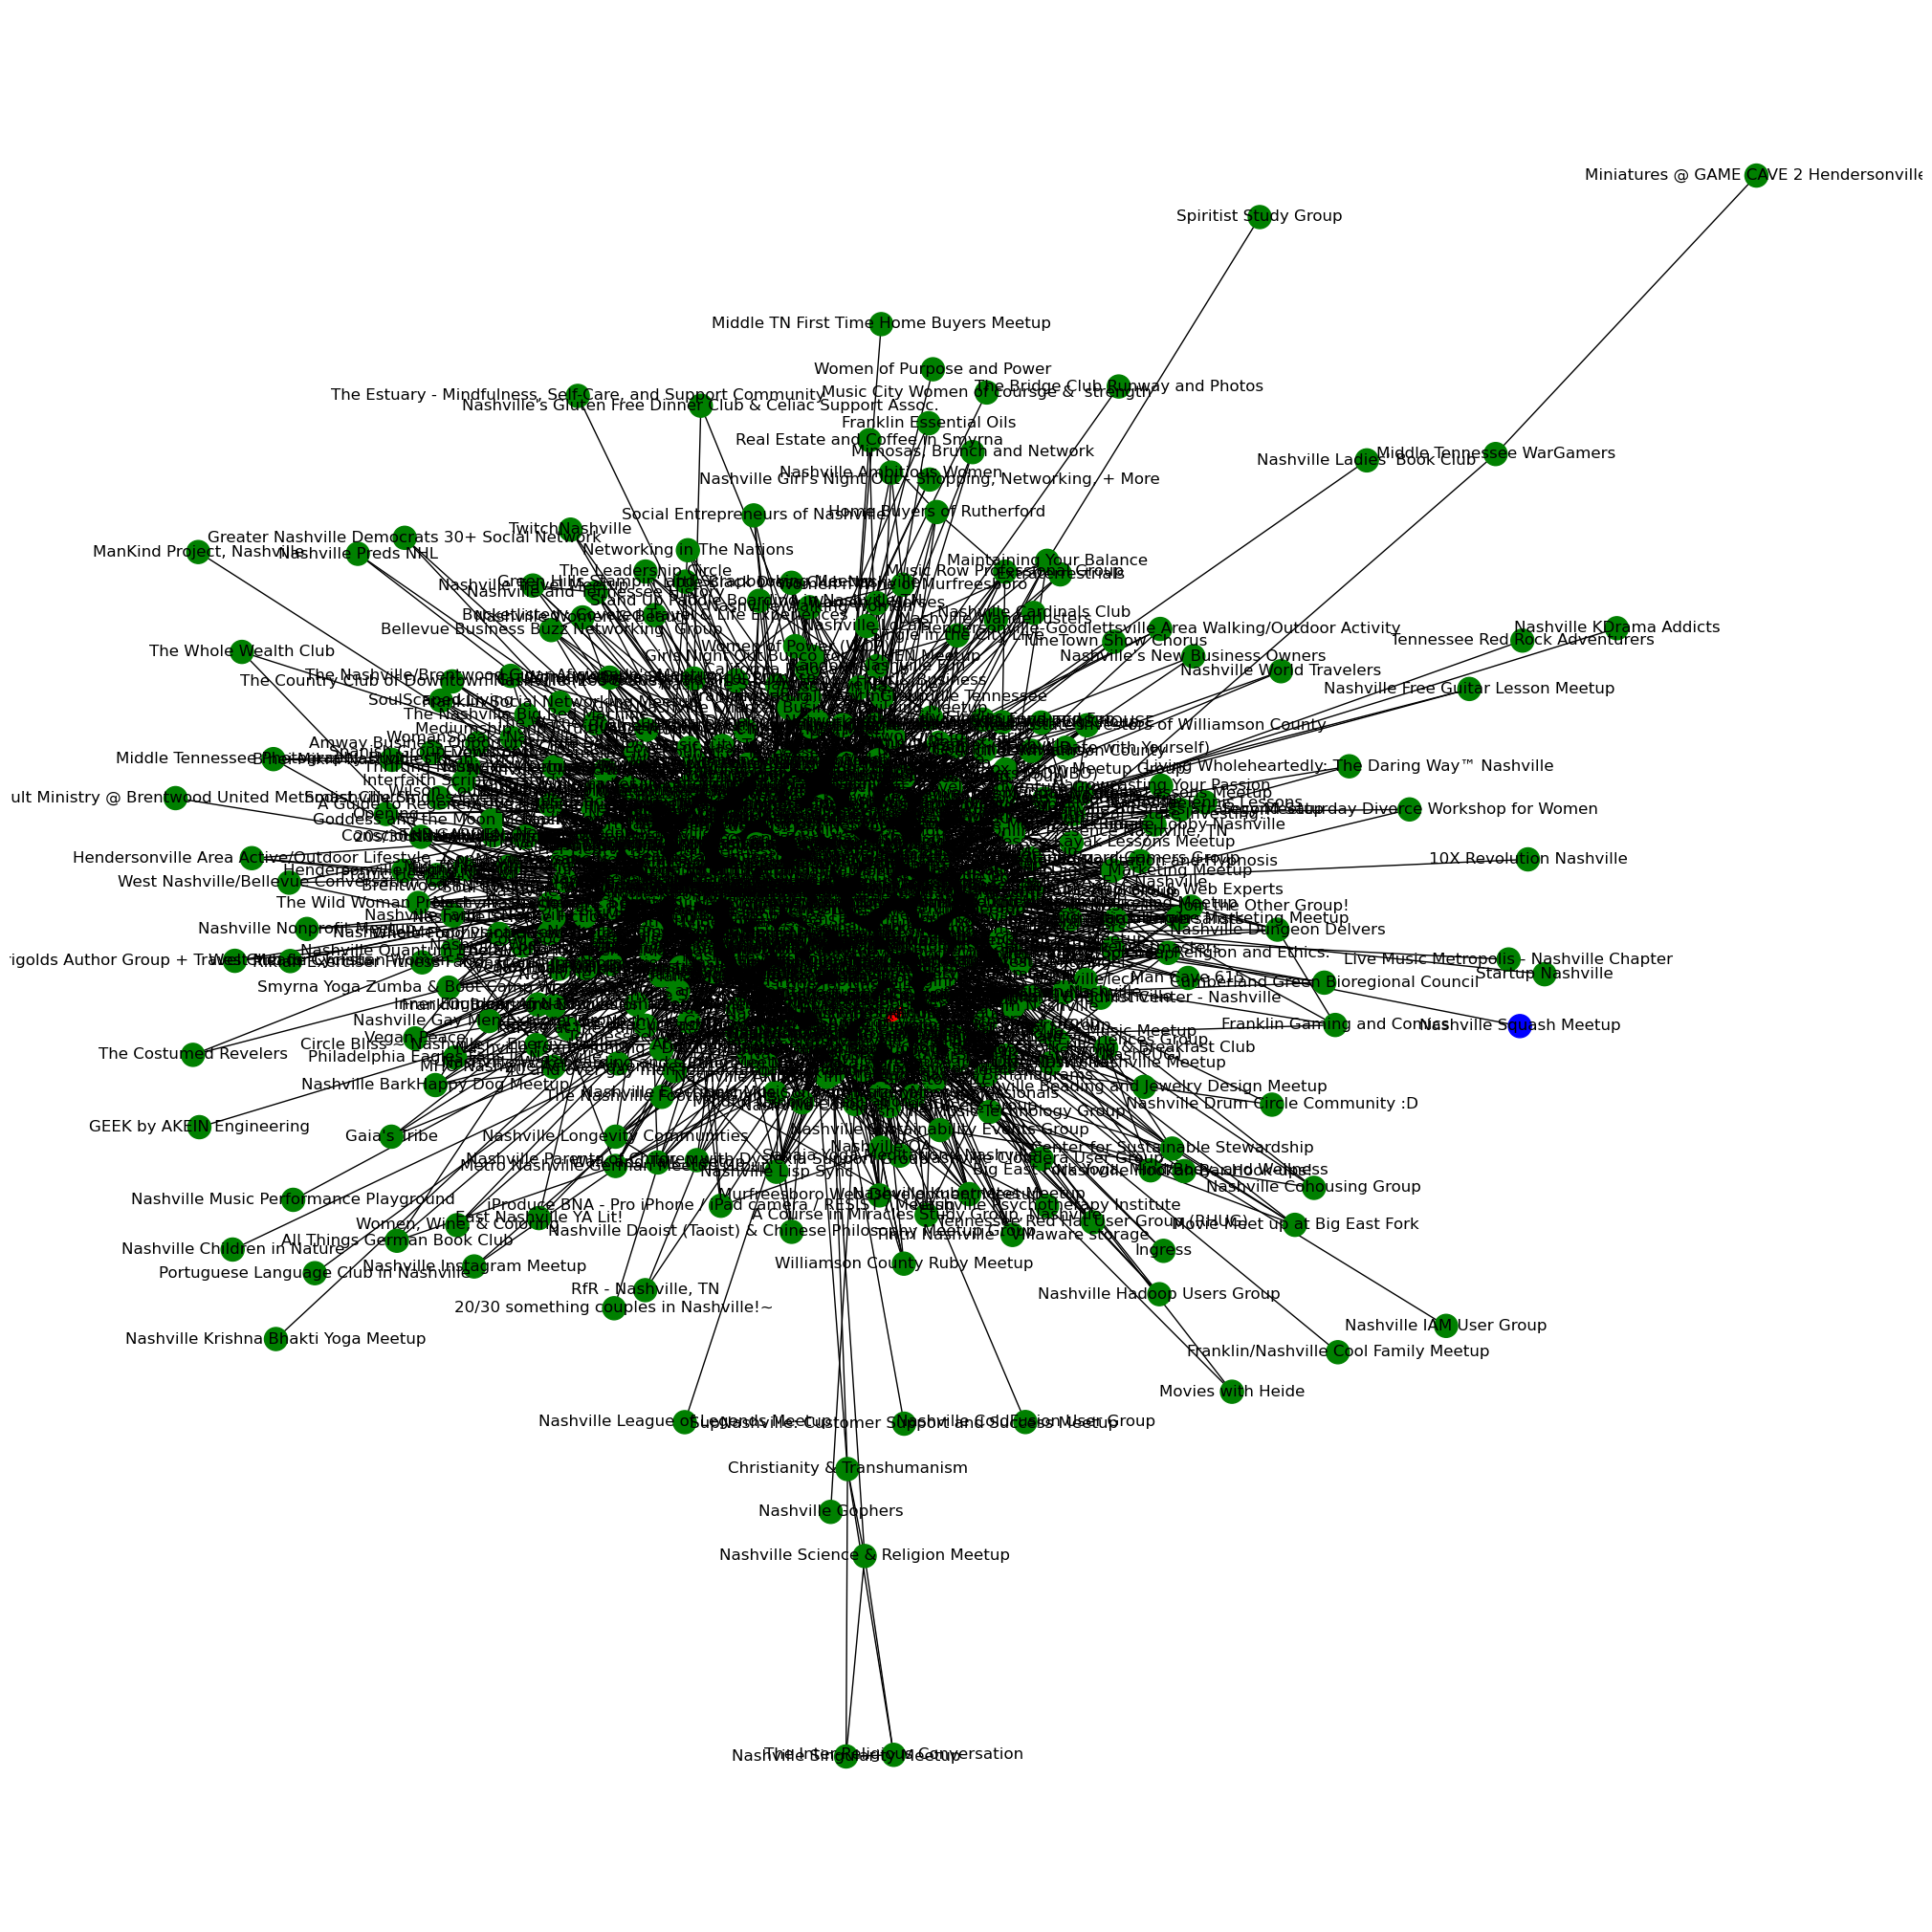

In [27]:
### Put your code here
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

# Define colors for different groups
node_colors = []
for node in G.nodes():
    if node == "Data Science Nashville":
        node_colors.append("red")
    elif node == "Nashville Squash Meetup":
        node_colors.append("blue")
    else:
        node_colors.append("green")  

# Draw the graph 
nx.draw(G, with_labels=True, node_color=node_colors)
plt.show()

#https://stackoverflow.com/questions/27030473/how-to-set-colors-for-nodes-in-networkx

Now, using **only the graph you created (not the initial row-based data)**, answer the following questions.

You may find it useful to review the "Methods" section of the [networkx Graph documentation](https://networkx.org/documentation/stable/reference/classes/graph.html#methods).

&#9989; **Question 2.4 (1 point)** What is the total number of groups?

In [32]:
### Put your code here
print("the total number of groups is",len(G.nodes))

the total number of groups is 456


&#9989; **Question 2.5 (1 point)** With how many connections does `"Code for Nashville"` have?

In [36]:
### Put your code here

# Get the number of connections "Code for Nashville"
num_connections = G.degree["Code for Nashville"]

print("Code for Nashville has", num_connections, "connections")

#https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html#networkx.Graph.degree

Code for Nashville has 117 connections


&#9989; **Question 2.6 (1 point)** True or False?: `"Nashville Online Entrepreneurs"` has a connection with `"Nashville Tennis Lessons"`. Use a graph method to determine this. 

In [39]:
### Put your code here

# Check if there is an edge between "Nashville Online Entrepreneurs" and "Nashville Tennis Lessons"
has_connection = G.has_edge("Nashville Online Entrepreneurs", "Nashville Tennis Lessons")

if has_connection == True:
    print("True: Nashville Online Entrepreneurs has a connection with Nashville Tennis Lessons.")
else:
    print("False: Nashville Online Entrepreneurs does not have a connection with Nashville Tennis Lessons.")

#https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.has_edge.html#networkx.Graph.has_edge

False: Nashville Online Entrepreneurs does not have a connection with Nashville Tennis Lessons.


&#9989; **Question 2.7 (1 point)** Using the relevant `networkx` function (consult the documentation/internet resources), **find the "shortest path" between `"All Things German Book Club"` and `"Data Science Nashville"`**. The two groups are not directly connected, but you should be able to determine a set of nodes to "traverse" to get from one group to the other.

In [40]:
### Put your code here

# Find the shortest path between "All Things German Book Club" and "Data Science Nashville"
shortest_path = nx.shortest_path(G, source="All Things German Book Club", target="Data Science Nashville")

print("Shortest path between All Things German Book Club' and 'Data Science Nashville:", shortest_path)

#https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html#networkx.algorithms.shortest_paths.generic.shortest_path

Shortest path between All Things German Book Club' and 'Data Science Nashville: ['All Things German Book Club', 'All Things Gardening', 'Data Science Nashville']


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 2**", and push the changes to GitHub.

---

---
## Part 3: Perform a regression analysis on data (16 points)

We will now be looking at a dataset of housing prices in Boston. 

&#9989; **Question 3.1 (2 points)**: To get started, **download the `BostonHousing.csv` file and place it in the same directory as your notebook**, then **read in the `BostonHousing.csv` dataset** and finally **display the first few rows of the data**. You can use **Pandas** for this task or any other Python tool you prefer.

In [42]:
### Put your code here
BostonHousing = pd.read_csv("BostonHousing.csv")
BostonHousing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


You should see a list of house median values with several different pieces of information about them, such as the crime rate, age, property tax rate, etc.

You will be trying to predict `medv` (median value) using linear regression using a subset of the other features.

&#9989; **Question 3.2 (3 points)**: Create two arrays and/or dataframes from the data you just loaded, one of them called `y`, the other one called `X`. `y` should **only** include the `medv` column, while `X` should include **all the remaining columns**:

In [43]:
### Put your code here
import pandas as pd

# Extract 'medv' column into y
y = BostonHousing['medv']

# Extract all columns except 'medv' into X
X = BostonHousing.drop('medv', axis=1)




Now that we have the labels and features to fit, we will use the `statsmodels` `OLS` model to fit it. 

&#9989; **Question 3.3 (2 point)**: Before we do this, **add a column of constants (set to 1.0) to the `X`**. There is a `statsmodel` function you saw in class that allows you to do that. Call this new data structure `X_const`. (If you cannot figure this out, you can use `X` instead of `X_const` for the next questions.) Display the first 5 rows of `X_const` to make sure the new column exists.

In [44]:
### Put your code here
import statsmodels.api as sm

# Add a column of constants to X
X_const = sm.add_constant(X)

# Display the first 5 rows of X_const
print(X_const.head())

#Day 13 In-Class

   const     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    1.0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    1.0  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    1.0  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    1.0  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    1.0  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   

   ptratio       b  lstat  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


Now you will perform the actual fit.

&#9989; **Question 3.4 (3 points)**: Using `statsmodels` `OLS`, perform a fit using `y` (containing `medv`) as the quantity to fit (y) and fit it to the `X_const` (X). Once the fit is done print the fit `summary()`.

In [46]:
### Put your code here

#fitting the model
model = sm.OLS(y, X_const)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 18 Apr 2024   Prob (F-statistic):          6.72e-135
Time:                        11:22:52   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
b              0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

&#9989; **Question 3.5 (2 points)**: Which 2 features would you say contributes the least to the fit result and/or is the least significant? Make sure to justify your answer with a sentence or two. 

<font size=+3>&#9998;</font> indus and age contribute the least to the fit result and/or is the least significant. Features with higher p-values, typically above a significance threshold like 0.05, are less significant. 

&#9989; **Question 3.6 (2 points)**: Now **run the fit again, but with the "least important" features you identified in Q3.5 removed**. Make sure your new features still include the `constant` column (unless that happens to be one of the least important features). **Print the fit `summary()`.**

In [50]:
### Put your code here

# removing the least important features
X_const_filtered = X_const.drop(['indus', 'age'], axis=1)

#fitting the model without the least important features
model = sm.OLS(y, X_const_filtered)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 18 Apr 2024   Prob (F-statistic):          5.54e-137
Time:                        11:29:31   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
crim          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
zn             0.0458      0.014      3.390      0.001       0.019       0.072
chas           2.7187      0.854      3.183      0.002       1.040       4.397
nox          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
rm             3.8016      0.406      9.356      0.000       3.003       4.600
dis           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
rad            0.2996      0.063      4.726      0.000       0.175       0.424
tax           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
ptratio       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
b              0.0093      0.003      3.475      0.001       0.004       0.015
lstat         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

&#9989; **Question 3.7 (2 points)**: Comment on the difference in fit quality between the two fits you just performed. Is one much better or worse than the other? Is the difference what you expected? Explain how you judged the quality given the fit statistics you printed.

<font size=+3>&#9998;</font>The R-squared values are the same, the Adjusted R-squared values are different the regression without the least important factors is better by 0.001. The difference is not what I expected

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", and push the changes to GitHub.

---

---
## Part 4: Perform a support vector machine (SVM) classification on data (16 points)

For this part of the exam, you will be using a dataset that records metrics about songs and the goal is to predict the genre of the song. 

&#9989; **Question 4.1 (1 point)**: To get started, **download the `music_genre_classifier.csv` file and place it in the same directory as your notebook**, then **read in the `music_genre_classifier.csv` dataset** and finally **display the first few rows of the data**. You can use **Pandas** for this task or any other Python tool you prefer.

In [52]:
### Put your code here
music_genre = pd.read_csv("music_genre_classifier.csv")
music_genre

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
0,-0.773939,1.418044,-1.125987,-0.093398,-0.209061,-0.459777,-0.626252,0.165364,-0.183171,0.866349,-1.515289,Electronic
1,1.585087,-0.054113,-0.301089,-1.700983,0.288891,-0.549014,-0.110914,0.924045,-0.594082,0.688392,-0.390477,Rock
2,0.437453,0.676077,-0.542386,1.090601,-0.722217,-0.549014,-0.461996,0.267866,-0.675309,-0.523843,-0.471808,Anime
3,-1.411513,1.983352,-2.231464,-1.700983,-1.904378,-0.099712,-0.619983,-1.826481,-0.473676,-2.318981,-1.555142,Anime
4,-1.794058,1.953908,-0.503105,-0.806935,-1.649700,2.415126,-0.487073,-1.705959,-0.595038,-0.598166,-1.317654,Anime
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.054908,0.019495,1.640509,0.097236,-0.334499,-0.549014,-0.800539,0.699698,-0.547258,0.196565,0.585499,Alternative
9996,1.138785,0.920455,0.866114,-1.700983,0.471347,-0.548971,-0.574844,0.389712,0.432241,1.551079,1.297148,Hip-Hop
9997,-1.028969,0.723186,-0.497493,-1.700983,-1.022509,-0.549010,0.258976,-1.161706,-0.468898,-0.687929,-0.939463,Classical
9998,0.947512,0.693743,1.258923,-0.125934,-0.155845,-0.549014,1.249529,0.145525,1.722313,-2.318981,0.239841,Rap


We will now try to perform **classification**. We will try to see if we can classify the genre using the metrics that are given. We will need perform a train-test split on the data first.

&#9989; **Question 4.2 (3 points)**: **Create two data structures** (e.g. dataframes) from your table: one called `labels` containing **only** the values from the `music_genre` column and one called `features` containing **everything but** the `music_genre` column.

Then, perform a **train-test-split** using functions we used in class. Use a `train_size` of `0.75` and `random_state` of `10`. You should now have a training and a testing set with "labels" and "features" each.

In [53]:
### Put your code here
from sklearn.model_selection import train_test_split
# Extract labels 
labels = music_genre['music_genre']

# Extract features
features = music_genre.drop('music_genre', axis=1)

# Perform train-test-split
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.75, random_state=10)


&#9989; **Question 4.3 (6 points)**: **Fit an SVM classifier (using the `sklearn` `SVC` class) to the dataset.** Use a `linear` kernel and set the hyper-parameter `C=1.0`. Then **fit your *training* set** and use the resulting fit to **predict your the *testing* set** so you get predicted labels for the testing set. Finally, print the fit statistics using `confusion_matrix` and `classification_report` (if you prefer the visual plot version of the confusion matrix, you can use `ConfusionMatrixDisplay` from `sklearn.metrics` instead).

In [59]:
### Put your code here

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Initialize SVM classifier with linear kernel and C=1.0
svm_classifier = SVC(kernel='linear', C=1.0)

# Fit the classifier to the training set
svm_classifier.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = svm_classifier.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#Homework 4

Confusion Matrix:
[[ 97   0   3   1  33  14  21  11  13  47]
 [  8 171  19  37  14  10   0  11   0   0]
 [  9  47 137   2  24  23   0  19   2  10]
 [  3  18   9 194   0   8   0  11   0   0]
 [ 18   5  22   0 109  11   8   9   3  50]
 [ 12  24  16   2  19 149   6  29   6   8]
 [ 15   0   0   0   6   6 104   1  94  19]
 [  3  13  31  19  29  31   5  94   1  12]
 [ 22   0   0   0   3   1  78   3 117  30]
 [ 25   1   0   1   7   1   4   3  17 172]]

Classification Report:
              precision    recall  f1-score   support

 Alternative       0.46      0.40      0.43       240
       Anime       0.61      0.63      0.62       270
       Blues       0.58      0.50      0.54       273
   Classical       0.76      0.80      0.78       243
     Country       0.45      0.46      0.46       235
  Electronic       0.59      0.55      0.57       271
     Hip-Hop       0.46      0.42      0.44       245
        Jazz       0.49      0.39      0.44       238
         Rap       0.46      0.46      0

&#9989; **Question 4.4 (3 points)**: Interpret the output of your classification report and the confusion matrix by answering these three questions (provide at least 1 or 2 sentences each for full credit): 
* Explain in a few sentences what you observe in the confusion matrix. 
* Would you consider this a good or a bad classifier?
* Which quantity from the classification report did you use to make this judgement?

<font size=+3>&#9998;</font> it is a bad classifier it has an accuracy score of 0.54, accuracy score

&#9989; **Question 4.5 (3 points)**: We have been using machine learning "jargon" in this section and in class. In a few sentences each explain the following concepts:
* What are "labels" and "features"?
* Why do we need "training sets" and "testing sets"?

<font size=+3>&#9998;</font> 

**Labels:*A label is the thing we're predicting—the y variable in simple linear regression.n.

**Features:** Features are the input variables used by a machine learning model to make predictions, describing the characteristics or attributes of the data.

**Training Sets:** Training sets are used to train machine learning models by fitting them to the provided data, consisting of both features and their corresponding labels.

**Testing Sets:** Testing sets are independent subsets of the data used to evaluate the performance of trained models, allowing assessment of their ability to generalize to new, unseen data.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 4**", and push the changes to GitHub.

---

## You're done! Congrats on finishing your CMSE 202 Final!

Make sure all of your changes to your repository are committed and pushed to GitHub. Also upload a copy of this notebook to the dropbox on D2L in case something went wrong with your repository or if you couldn't get the repository to work.